In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2_contingency

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews#Womens%20Clothing%20E-Commerce%20Reviews.csv

In [42]:
e_comm_data = pd.read_csv('datasets/E-commerce.csv', index_col=0)

e_comm_data.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
14547,822,37,4,1,4,General Petite,Tops,Blouses
5577,861,32,5,1,0,General,Tops,Knits
22675,881,56,3,0,22,General,Tops,Knits
681,1087,62,4,1,1,General,Dresses,Dresses
23093,866,46,3,0,0,General,Tops,Knits
22948,945,26,5,1,0,General,Tops,Sweaters
17266,825,66,5,1,1,General,Tops,Blouses
8734,952,47,5,1,3,General,Tops,Sweaters
16355,995,30,5,1,0,General Petite,Bottoms,Skirts
8494,407,34,4,1,0,Initmates,Intimate,Swim


In [43]:
e_comm_data.shape

(23472, 8)

In [44]:
e_comm_data = e_comm_data[['Recommended IND', 'Rating']]

e_comm_data.head()

,Recommended IND,Rating
0,1,4
1,1,5
2,0,3
3,1,5
4,1,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18944dd0>]],
      dtype=object)

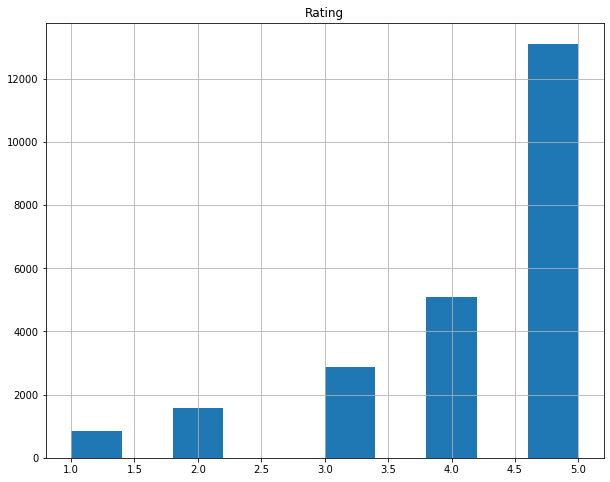

In [45]:
e_comm_data[['Rating']].hist(figsize=(10, 8))

### Make a dataframe which having columns `Rating` and contain sum of `frequency` of rating.

https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

In [46]:
df_for_obs = pd.crosstab(e_comm_data['Recommended IND'], e_comm_data['Rating'])

df_for_obs

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


### Returns values `Chi2-test`, `p-value`, `degree of freedom`, and `expected value` 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

https://en.wikipedia.org/wiki/Contingency_table

In [47]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(df_for_obs.values)

### `Chi2-test`

In [48]:
print('Chi2 stats: {}'. format(round(chi2, 3)))

Chi2 stats: 16711.664


### `p-value`

In [49]:
print('The p-values: {}'.format(p_value))

The p-values: 0.0


### `Degree of freedom`

In [50]:
print('The degree of freedom: {}'.format(degrees_of_freedom))

The degree of freedom: 4


### `Expected` occurance of `Rating`

In [51]:
expected_values

array([[  149.66019087,   278.16888207,   510.30214724,   902.40473756,
         2331.46404226],
       [  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
        10785.53595774]])

In [52]:
expected_df = pd.DataFrame({
    '0': expected_values[0],
    '1': expected_values[1],
})

In [53]:
expected_df

,0,1
0,149.660191,692.339809
1,278.168882,1286.831118
2,510.302147,2360.697853
3,902.404738,4174.595262
4,2331.464042,10785.535958


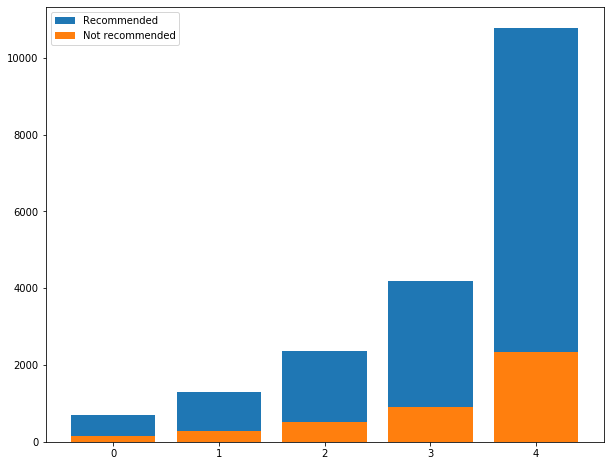

In [54]:
plt.figure(figsize=(10, 8))

plt.bar(expected_df.index, expected_df['1'], label="Recommended")
plt.bar(expected_df.index, expected_df['0'], label="Not recommended")

plt.legend()

In [55]:
ratings_recommended = e_comm_data[e_comm_data['Recommended IND'] == 1]

ratings_not_recommended = e_comm_data[e_comm_data['Recommended IND'] == 0]

In [56]:
ratings_recommended.shape, ratings_not_recommended.shape

((19300, 2), (4172, 2))

In [62]:
ratings_recommended.sample(10)

,Recommended IND,Rating
490,1,5
9554,1,5
8517,1,5
22623,1,5
11119,1,5
342,1,5
21133,1,5
17281,1,5
15664,1,5
5980,1,5


In [63]:
ratings_not_recommended.sample(10)

,Recommended IND,Rating
19856,0,4
20779,0,3
21999,0,2
18796,0,3
21966,0,4
20571,0,3
6968,0,2
22318,0,2
8440,0,1
17456,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a194bb390>]],
      dtype=object)

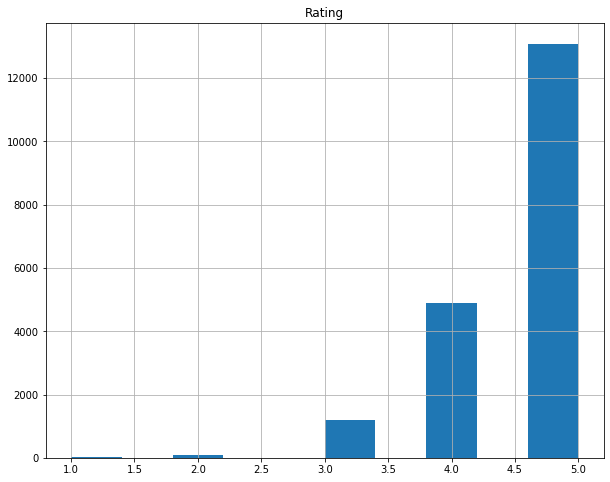

In [64]:
ratings_recommended[['Rating']].hist(figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19b21b90>]],
      dtype=object)

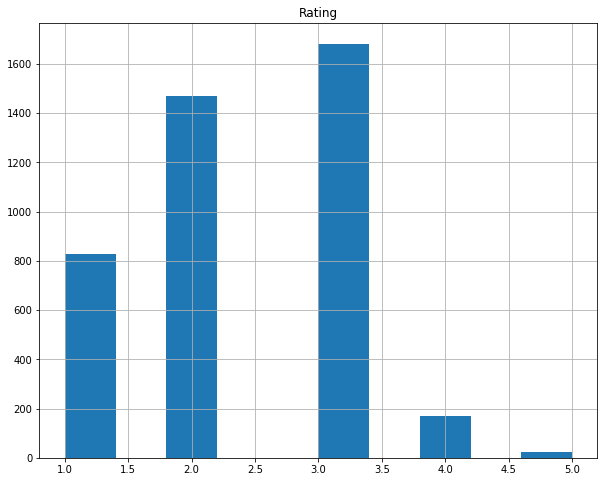

In [65]:
ratings_not_recommended[['Rating']].hist(figsize=(10, 8))

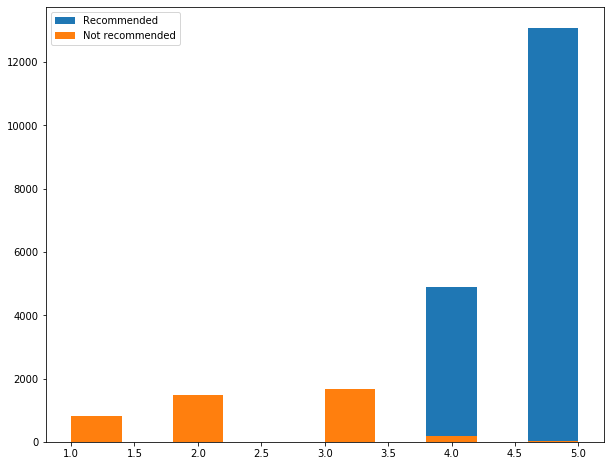

In [66]:
plt.figure(figsize=(10, 8))

plt.hist(ratings_recommended['Rating'], label="Recommended")
plt.hist(ratings_not_recommended['Rating'], label="Not recommended")

plt.legend()